### baseline必要性
通过与baseline对比，判断其他模型的效果如何，从而判断某个模型应该继续改进还是抛弃。

The technique used to generate a forecast to calculate the baseline performance must be easy to implement and naive of problem-specific details.

#### 建baseline之前，需develop a test harness：
+ The dataset you intend to use to train and evaluate models.
+ The resampling technique you intend to use to estimate the performance of the technique (e.g. train/test split).
+ The performance measure you intend to use to evaluate forecasts (e.g. mean squared error).

#### 一个好的baseline forecast技术的3个特点：
+ Simple: A method that requires little or no training or intelligence.
+ Fast: A method that is fast to implement and computationally trivial to make a prediction.
+ Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input.

#### 监督及其学习最常用的baseline方法
+ Zero Rule算法[http://machinelearningmastery.com/implement-baseline-machine-learning-algorithms-scratch-python/]

+ Random Prediction Algorithm.

+ Persistence Algorithm




#### 1. Random Prediction Algorithm

In [8]:
from random import seed
from random import randrange

# Generate random predictions
def random_algorithm(train, test):
	output_values = [row[-1] for row in train]
	unique = list(set(output_values))
	predicted = list()
	for row in test:
		index = randrange(len(unique))
		predicted.append(unique[index])
	return predicted

seed(31)
train = [[0], [1], [0], [1], [0], [1]]
test = [[None], [None], [None], [None]]
predictions = random_algorithm(train, test)
print(predictions)

[0, 1, 0, 1]


#### 2. Zero Rule Algorithm
The Zero Rule Algorithm is a better baseline than the random algorithm.

##### 分类问题

In [10]:
from random import seed
from random import randrange

# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
	output_values = [row[-1] for row in train]
    # 取出现次数最多的
	prediction = max(set(output_values), key=output_values.count)
	predicted = [prediction for i in range(len(test))]
	return predicted

seed(1)
train = [['0'], ['0'], ['0'], ['0'], ['1'], ['1']]
test = [[None], [None], [None], [None]]
predictions = zero_rule_algorithm_classification(train, test)
print(predictions)

['0', '0', '0', '0']


##### 回归问题
取mean,  median，the mean of the last n records 

In [11]:
from random import seed
from random import randrange

# zero rule algorithm for regression
def zero_rule_algorithm_regression(train, test):
	output_values = [row[-1] for row in train]
	prediction = sum(output_values) / float(len(output_values))
	predicted = [prediction for i in range(len(test))]
	return predicted

seed(1)
train = [[10], [15], [12], [15], [18], [20]]
test = [[None], [None], [None], [None]]
predictions = zero_rule_algorithm_regression(train, test)
print(predictions)

[15.0, 15.0, 15.0, 15.0]


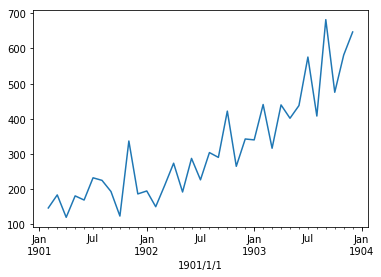

In [14]:
%matplotlib inline
from pandas import read_csv,DataFrame
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	# return datetime.strptime('190'+x, '%Y/%m')
    return datetime.strptime(x, '%Y/%m/%d')

series = read_csv('../data/sales-of-shampoo-over-a-three-year.csv', 
                  header=1, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser, engine='python', skipfooter=2)
series.plot()
pyplot.show()

Step 1: Define the Supervised Learning Problem

In [15]:
import pandas as pd
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

     t-1    t+1
0    NaN  145.9
1  145.9  183.1
2  183.1  119.3
3  119.3  180.3
4  180.3  168.5


     t-1    t+1
0    NaN  145.9
1  145.9  183.1
2  183.1  119.3
3  119.3  180.3
4  180.3  168.5
Test MSE: 18703.658


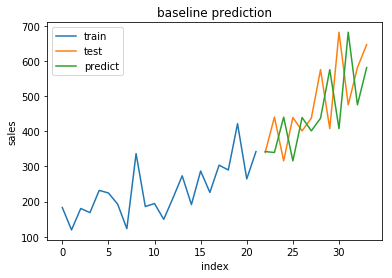

In [16]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime(x, '%Y/%m/%d')

series = read_csv('../data/sales-of-shampoo-over-a-three-year.csv', 
                  header=1, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser, engine='python', skipfooter=2)
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.xlabel("index")
pyplot.ylabel("sales")
pyplot.legend(["train","test","predict"])
pyplot.title("baseline prediction")
pyplot.show()

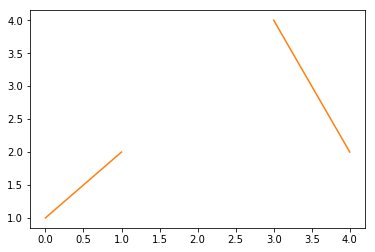

[1, 2]

In [17]:
pyplot.plot([None for i in [1, 2]])
pyplot.plot([i for i in [1, 2, None, 4,2]])
pyplot.show()
[i for i in [1, 2]]
